In [2]:
import classifierMLP as cmlp

import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
    print(labels_path)
    print(images_path)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels


In [4]:
# unzips mnist
%matplotlib inline
import sys
import gzip
import shutil

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read()) 
        
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

train-labels-idx1-ubyte
train-images-idx3-ubyte
Rows: 60000, columns: 784
t10k-labels-idx1-ubyte
t10k-images-idx3-ubyte
Rows: 10000, columns: 784


In [5]:
X_train.shape

(60000, 784)

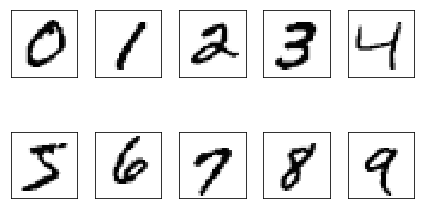

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()



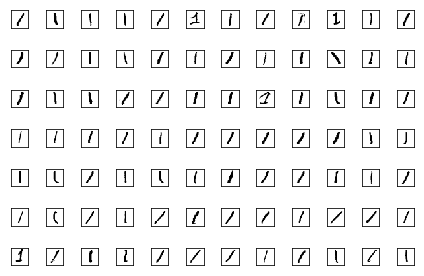

In [9]:
fig, ax = plt.subplots(nrows=7, ncols=12, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(84):
    img = X_train[y_train == 1][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

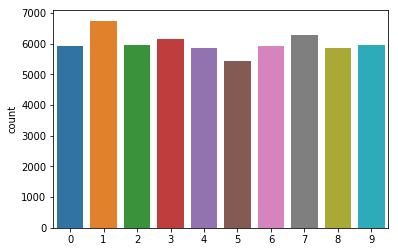

In [10]:
import seaborn as sns
sns.countplot(y_train)

In [11]:
n_epochs = 100

nn = cmlp.SimpleMLP(n_hidden_units=100, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:55000], 
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])



100/100 | Cost: 7909.96 | Train/Valid Acc.: 98.47%/97.78%  

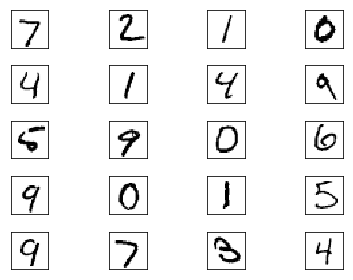

In [12]:
#playing with the traiued model
fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_test[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [13]:
#Lets test for X_test - 1 to 20
for i in range(20):
    print ("Prediction for {}th image is {}".format(i,
                                        nn.predict(X_test[i:i+1])))

Prediction for 0th image is [7]
Prediction for 1th image is [2]
Prediction for 2th image is [1]
Prediction for 3th image is [0]
Prediction for 4th image is [4]
Prediction for 5th image is [1]
Prediction for 6th image is [4]
Prediction for 7th image is [9]
Prediction for 8th image is [6]
Prediction for 9th image is [9]
Prediction for 10th image is [0]
Prediction for 11th image is [6]
Prediction for 12th image is [9]
Prediction for 13th image is [0]
Prediction for 14th image is [1]
Prediction for 15th image is [5]
Prediction for 16th image is [9]
Prediction for 17th image is [7]
Prediction for 18th image is [3]
Prediction for 19th image is [4]


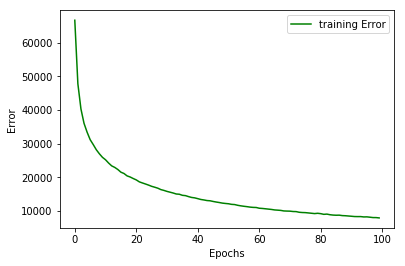

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'],color='green' ,
         label='training Error')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend()

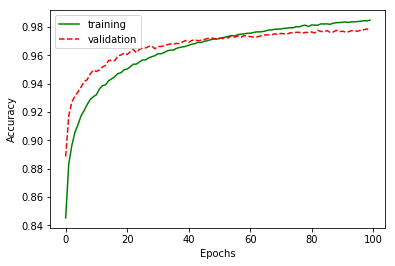

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['train_acc'],color='green' ,
         label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], color='red',
         label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
#plt.savefig('images/12_08.png', dpi=300)
plt.show()